In [1]:
import arrival
import numpy as np
from IPython.display import SVG
from PIL import Image

In [2]:
def display_pixel_image(grid, w=100):
    scale = int(w * 0.92) // grid.shape[1]
    iwh = grid.shape[1] * scale, grid.shape[0] * scale
    size = w, int(grid.shape[0] / grid.shape[1] * w)
    offset = (size[0] - iwh[0]) // 2
    with Image.fromarray(grid*255, mode='L') as im, im.resize(iwh, 0) as im2:
        with Image.new('L', size) as canvas:
            canvas.paste(im2, (offset, offset))
            display(canvas)
    
def display_n(n):
    g = arrival.encode_number(n)
    display_pixel_image(g)
    display(n)

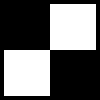

0

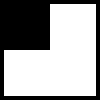

1

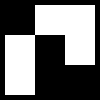

2

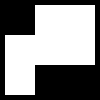

3

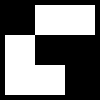

4

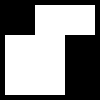

5

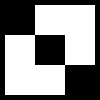

6

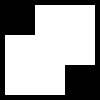

7

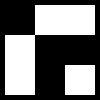

8

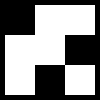

9

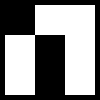

10

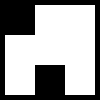

11

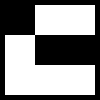

12

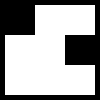

13

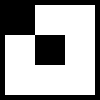

14

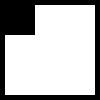

15

In [3]:
for i in range(16):
    display_n(i)

In [4]:
def ocr_arrival_image(fn):
    with Image.open(fn) as im:
        for symbol, box in arrival.ocr_image(im):
            yield (symbol, box, im.crop(box))
    
def decode_arrival_message(fn):
    res = list()
    run = None
    y = None
    for s, box, im in ocr_arrival_image(fn):
        if y != box[1]:
            y = box[1]
            if run: res.append(run)
            run = list()
        run.append(s)
    if run: res.append(run)
    return '\n'.join(' '.join(map(str, r)) for r in res)

def debug_ocr(fn, scale=4, pad=3):
    for symbol, box, crop in ocr_arrival_image(fn):
        crop = crop.resize((crop.size[0]*scale, crop.size[1]*scale), 0)
        wh = crop.size[0] + 2*pad, crop.size[1] + 2*pad
        px = np.zeros((*wh[::-1],3), dtype=np.uint8)
        with Image.fromarray(px, 'RGB') as im:
            im.paste(crop, (pad, pad))
            display(im)
        display(symbol)

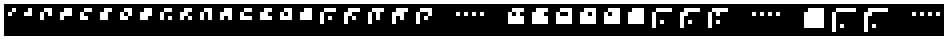

In [5]:
with Image.open('data/message2.png') as im:
    display(im)

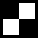

0

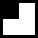

1

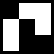

2

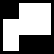

3

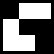

4

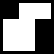

5

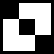

6

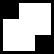

7

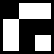

8

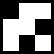

9

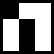

10

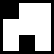

11

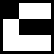

12

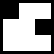

13

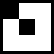

14

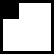

15

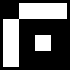

16

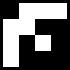

17

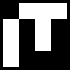

18

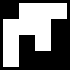

19

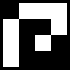

20

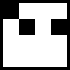

506

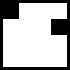

507

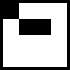

508

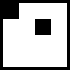

509

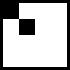

510

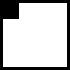

511

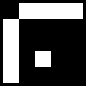

512

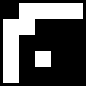

513

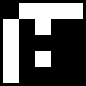

514

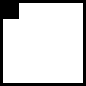

65535

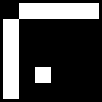

65536

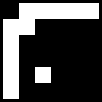

65537

In [6]:
debug_ocr('data/message2.png')

In [7]:
rs = decode_arrival_message('data/message2.png')
print(rs)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 506 507 508 509 510 511 512 513 514 65535 65536 65537


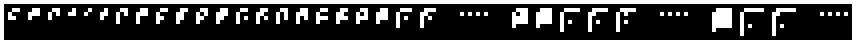

In [8]:
with Image.open('data/message3.png') as im:
    display(im)

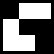

4

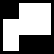

3

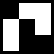

2

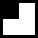

1

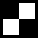

0

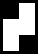

-1

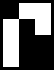

-2

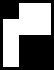

-3

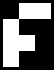

-4

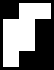

-5

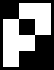

-6

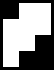

-7

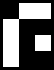

-8

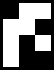

-9

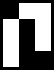

-10

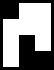

-11

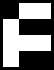

-12

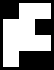

-13

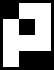

-14

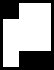

-15

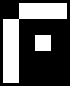

-16

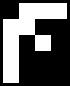

-17

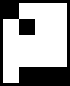

-510

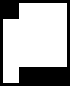

-511

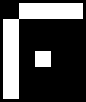

-512

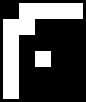

-513

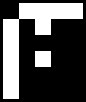

-514

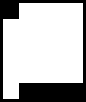

-65535

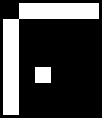

-65536

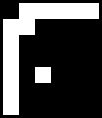

-65537

In [9]:
debug_ocr('data/message3.png')

In [10]:
rs = decode_arrival_message('data/message3.png')
print(rs)

4 3 2 1 0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -510 -511 -512 -513 -514 -65535 -65536 -65537


In [11]:
def annotate_and_decode(fn, scale=10, pad=3, reload=False, r=0):
    if reload or r:
        import importlib; importlib.reload(arrival)
    with Image.open(fn) as im:
        xim = arrival.annotate(im, scale=scale, pad=pad)
        display(SVG(data=xim))
    rs = decode_arrival_message(fn)
    print(rs)

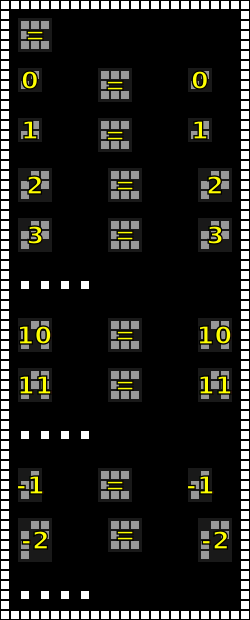

=
0 = 0
1 = 1
2 = 2
3 = 3
10 = 10
11 = 11
-1 = -1
-2 = -2


In [12]:
annotate_and_decode('data/message4.png')

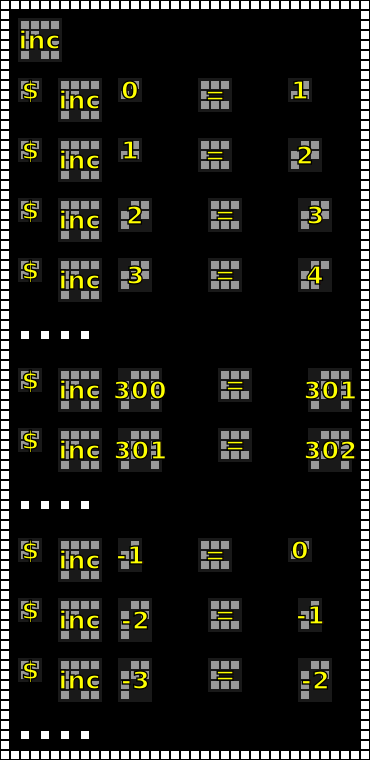

inc
$ inc 0 = 1
$ inc 1 = 2
$ inc 2 = 3
$ inc 3 = 4
$ inc 300 = 301
$ inc 301 = 302
$ inc -1 = 0
$ inc -2 = -1
$ inc -3 = -2


In [13]:
annotate_and_decode('data/message5.png')

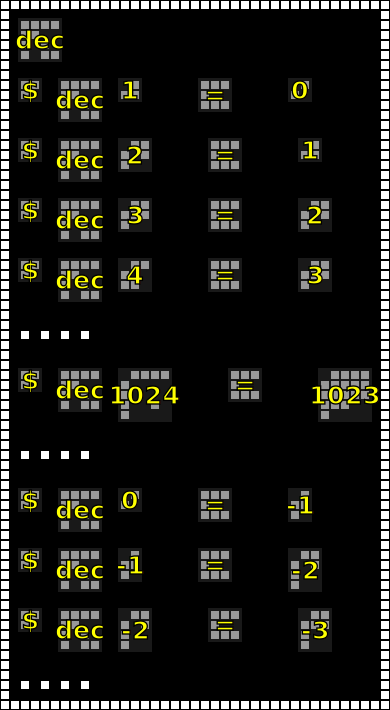

dec
$ dec 1 = 0
$ dec 2 = 1
$ dec 3 = 2
$ dec 4 = 3
$ dec 1024 = 1023
$ dec 0 = -1
$ dec -1 = -2
$ dec -2 = -3


In [14]:
annotate_and_decode('data/message6.png')

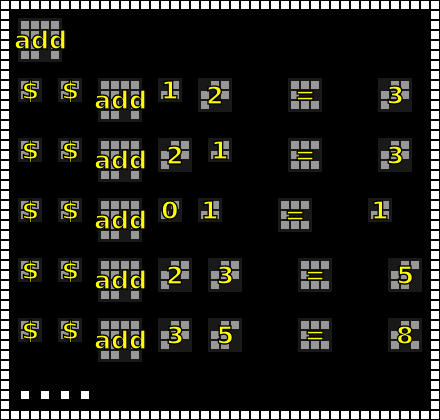

add
$ $ add 1 2 = 3
$ $ add 2 1 = 3
$ $ add 0 1 = 1
$ $ add 2 3 = 5
$ $ add 3 5 = 8


In [15]:
annotate_and_decode('data/message7.png')

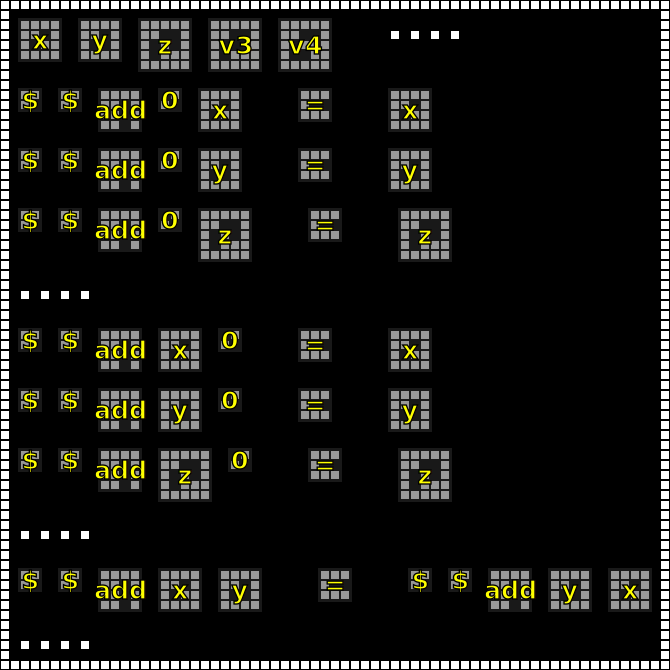

x y z v3 v4
$ $ add 0 x = x
$ $ add 0 y = y
$ $ add 0 z = z
$ $ add x 0 = x
$ $ add y 0 = y
$ $ add z 0 = z
$ $ add x y = $ $ add y x


In [16]:
annotate_and_decode('data/message8.png')

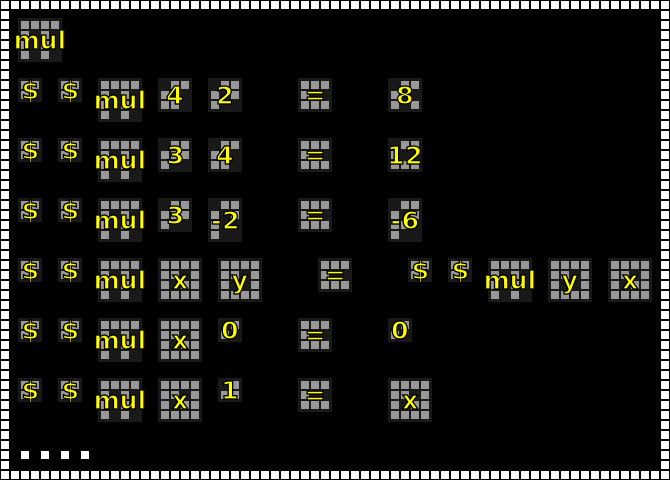

mul
$ $ mul 4 2 = 8
$ $ mul 3 4 = 12
$ $ mul 3 -2 = -6
$ $ mul x y = $ $ mul y x
$ $ mul x 0 = 0
$ $ mul x 1 = x


In [17]:
annotate_and_decode('data/message9.png')

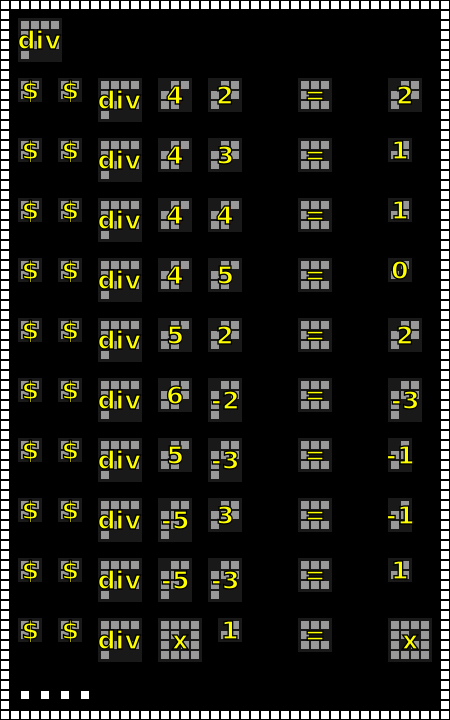

div
$ $ div 4 2 = 2
$ $ div 4 3 = 1
$ $ div 4 4 = 1
$ $ div 4 5 = 0
$ $ div 5 2 = 2
$ $ div 6 -2 = -3
$ $ div 5 -3 = -1
$ $ div -5 3 = -1
$ $ div -5 -3 = 1
$ $ div x 1 = x


In [18]:
annotate_and_decode('data/message10.png')

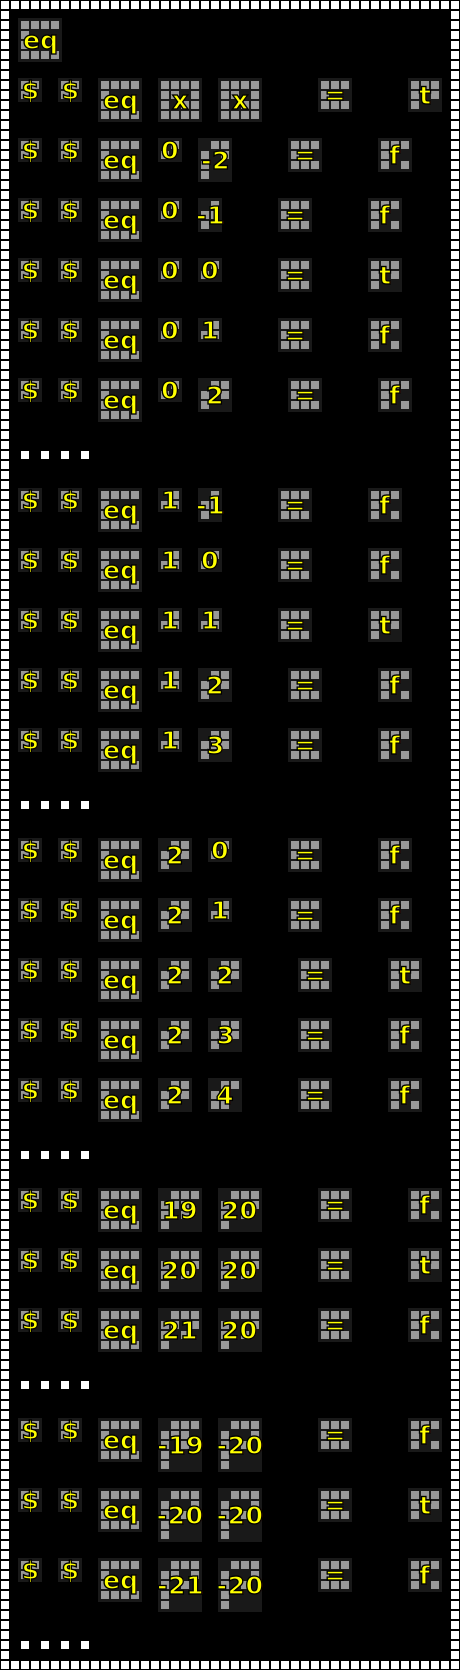

eq
$ $ eq x x = t
$ $ eq 0 -2 = f
$ $ eq 0 -1 = f
$ $ eq 0 0 = t
$ $ eq 0 1 = f
$ $ eq 0 2 = f
$ $ eq 1 -1 = f
$ $ eq 1 0 = f
$ $ eq 1 1 = t
$ $ eq 1 2 = f
$ $ eq 1 3 = f
$ $ eq 2 0 = f
$ $ eq 2 1 = f
$ $ eq 2 2 = t
$ $ eq 2 3 = f
$ $ eq 2 4 = f
$ $ eq 19 20 = f
$ $ eq 20 20 = t
$ $ eq 21 20 = f
$ $ eq -19 -20 = f
$ $ eq -20 -20 = t
$ $ eq -21 -20 = f


In [19]:
annotate_and_decode('data/message11.png')

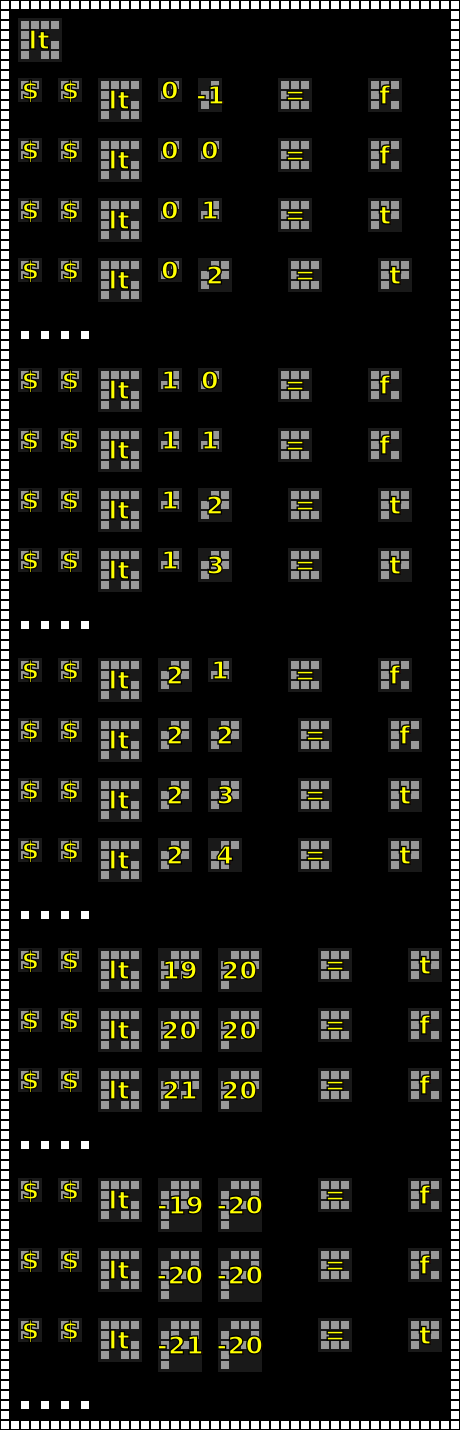

lt
$ $ lt 0 -1 = f
$ $ lt 0 0 = f
$ $ lt 0 1 = t
$ $ lt 0 2 = t
$ $ lt 1 0 = f
$ $ lt 1 1 = f
$ $ lt 1 2 = t
$ $ lt 1 3 = t
$ $ lt 2 1 = f
$ $ lt 2 2 = f
$ $ lt 2 3 = t
$ $ lt 2 4 = t
$ $ lt 19 20 = t
$ $ lt 20 20 = f
$ $ lt 21 20 = f
$ $ lt -19 -20 = f
$ $ lt -20 -20 = f
$ $ lt -21 -20 = t


In [20]:
annotate_and_decode('data/message12.png')

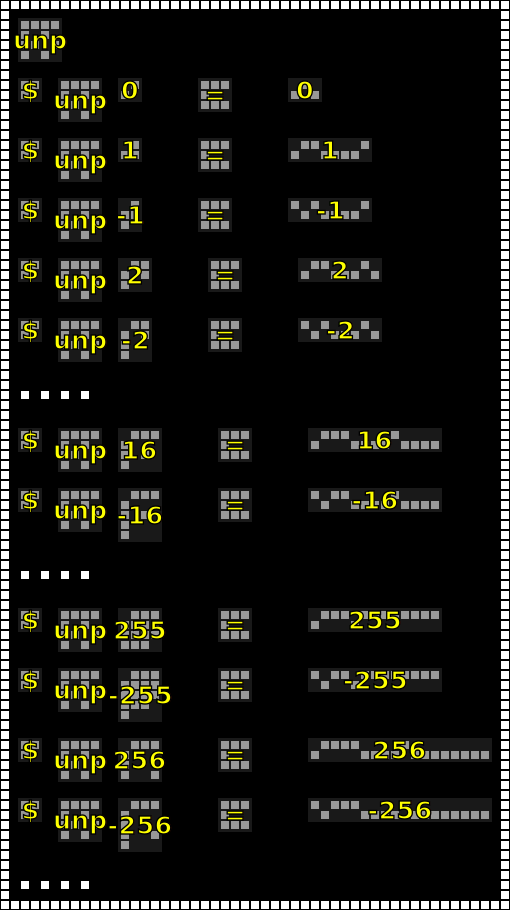

unp
$ unp 0 = 0
$ unp 1 = 1
$ unp -1 = -1
$ unp 2 = 2
$ unp -2 = -2
$ unp 16 = 16
$ unp -16 = -16
$ unp 255 = 255
$ unp -255 = -255
$ unp 256 = 256
$ unp -256 = -256


In [21]:
annotate_and_decode('data/message13.png')

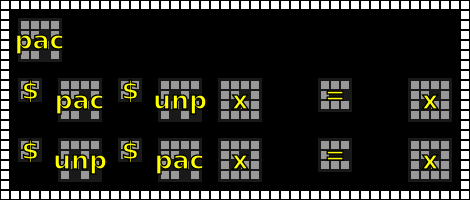

pac
$ pac $ unp x = x
$ unp $ pac x = x


In [22]:
annotate_and_decode('data/message14.png')

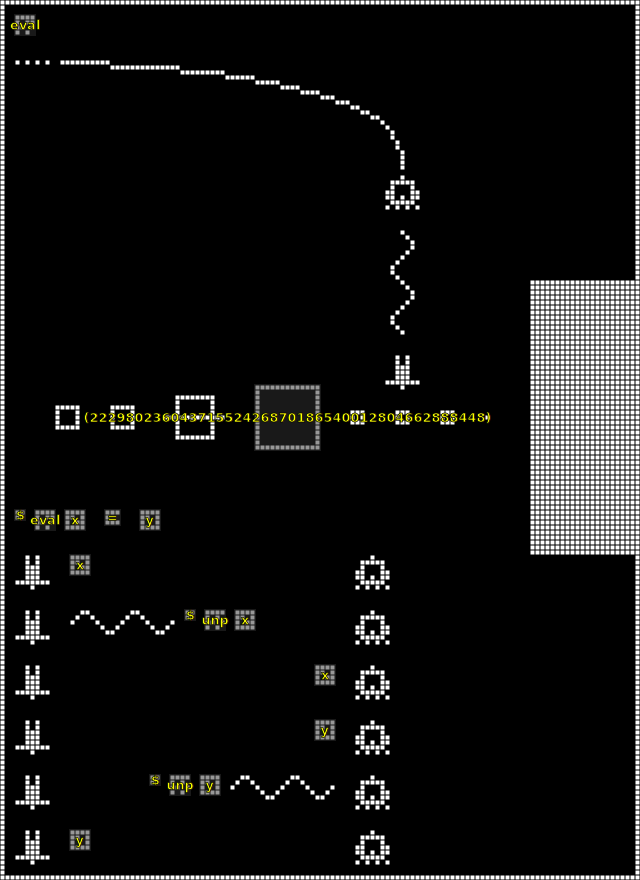

eval
(22298023604371552426870186540012804662888448)
$ eval x = y
x
$ unp x
x
y
$ unp y
y


In [23]:
annotate_and_decode('data/message15.png', scale=5)

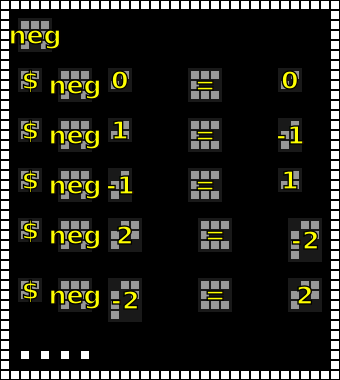

neg
$ neg 0 = 0
$ neg 1 = -1
$ neg -1 = 1
$ neg 2 = -2
$ neg -2 = 2


In [24]:
annotate_and_decode('data/message16.png')

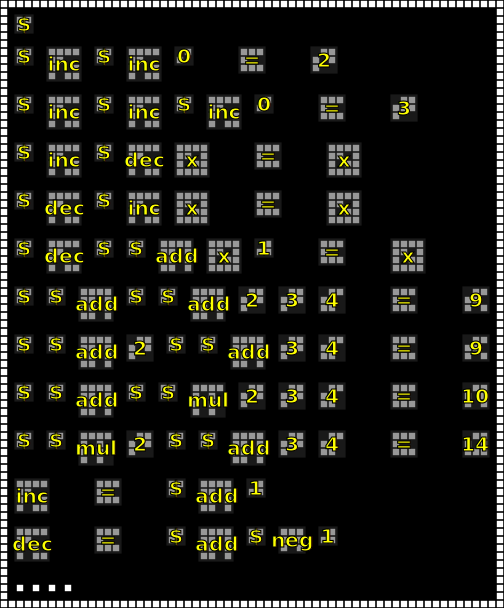

$
$ inc $ inc 0 = 2
$ inc $ inc $ inc 0 = 3
$ inc $ dec x = x
$ dec $ inc x = x
$ dec $ $ add x 1 = x
$ $ add $ $ add 2 3 4 = 9
$ $ add 2 $ $ add 3 4 = 9
$ $ add $ $ mul 2 3 4 = 10
$ $ mul 2 $ $ add 3 4 = 14
inc = $ add 1
dec = $ add $ neg 1


In [25]:
annotate_and_decode('data/message17.png', scale=8)

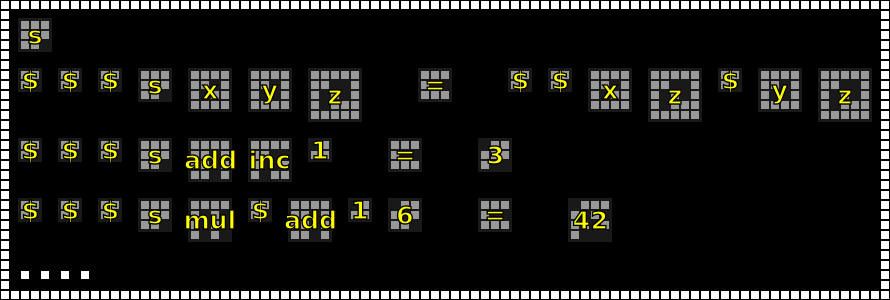

s
$ $ $ s x y z = $ $ x z $ y z
$ $ $ s add inc 1 = 3
$ $ $ s mul $ add 1 6 = 42


In [26]:
annotate_and_decode('data/message18.png')

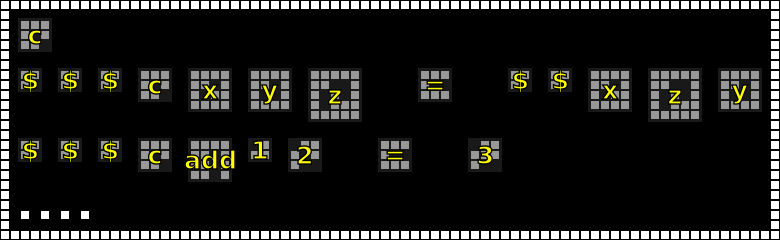

c
$ $ $ c x y z = $ $ x z y
$ $ $ c add 1 2 = 3


In [27]:
annotate_and_decode('data/message19.png')

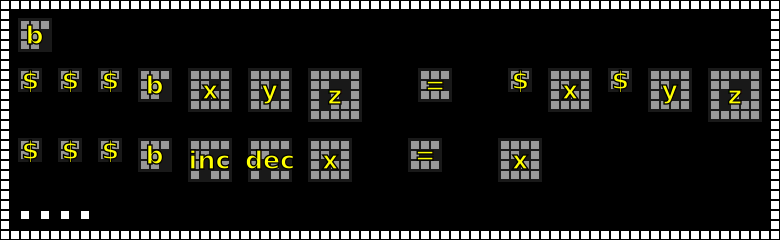

b
$ $ $ b x y z = $ x $ y z
$ $ $ b inc dec x = x


In [28]:
annotate_and_decode('data/message20.png')

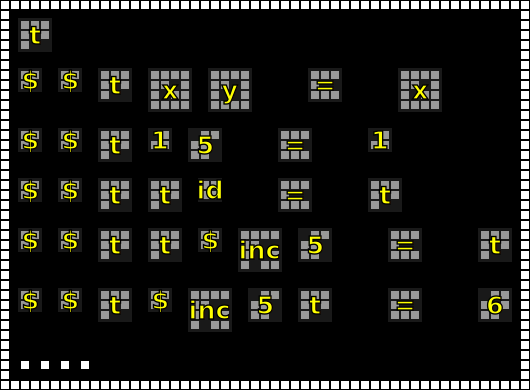

t
$ $ t x y = x
$ $ t 1 5 = 1
$ $ t t id = t
$ $ t t $ inc 5 = t
$ $ t $ inc 5 t = 6


In [29]:
annotate_and_decode('data/message21.png')

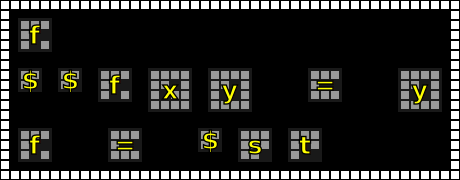

f
$ $ f x y = y
f = $ s t


In [30]:
annotate_and_decode('data/message22.png')

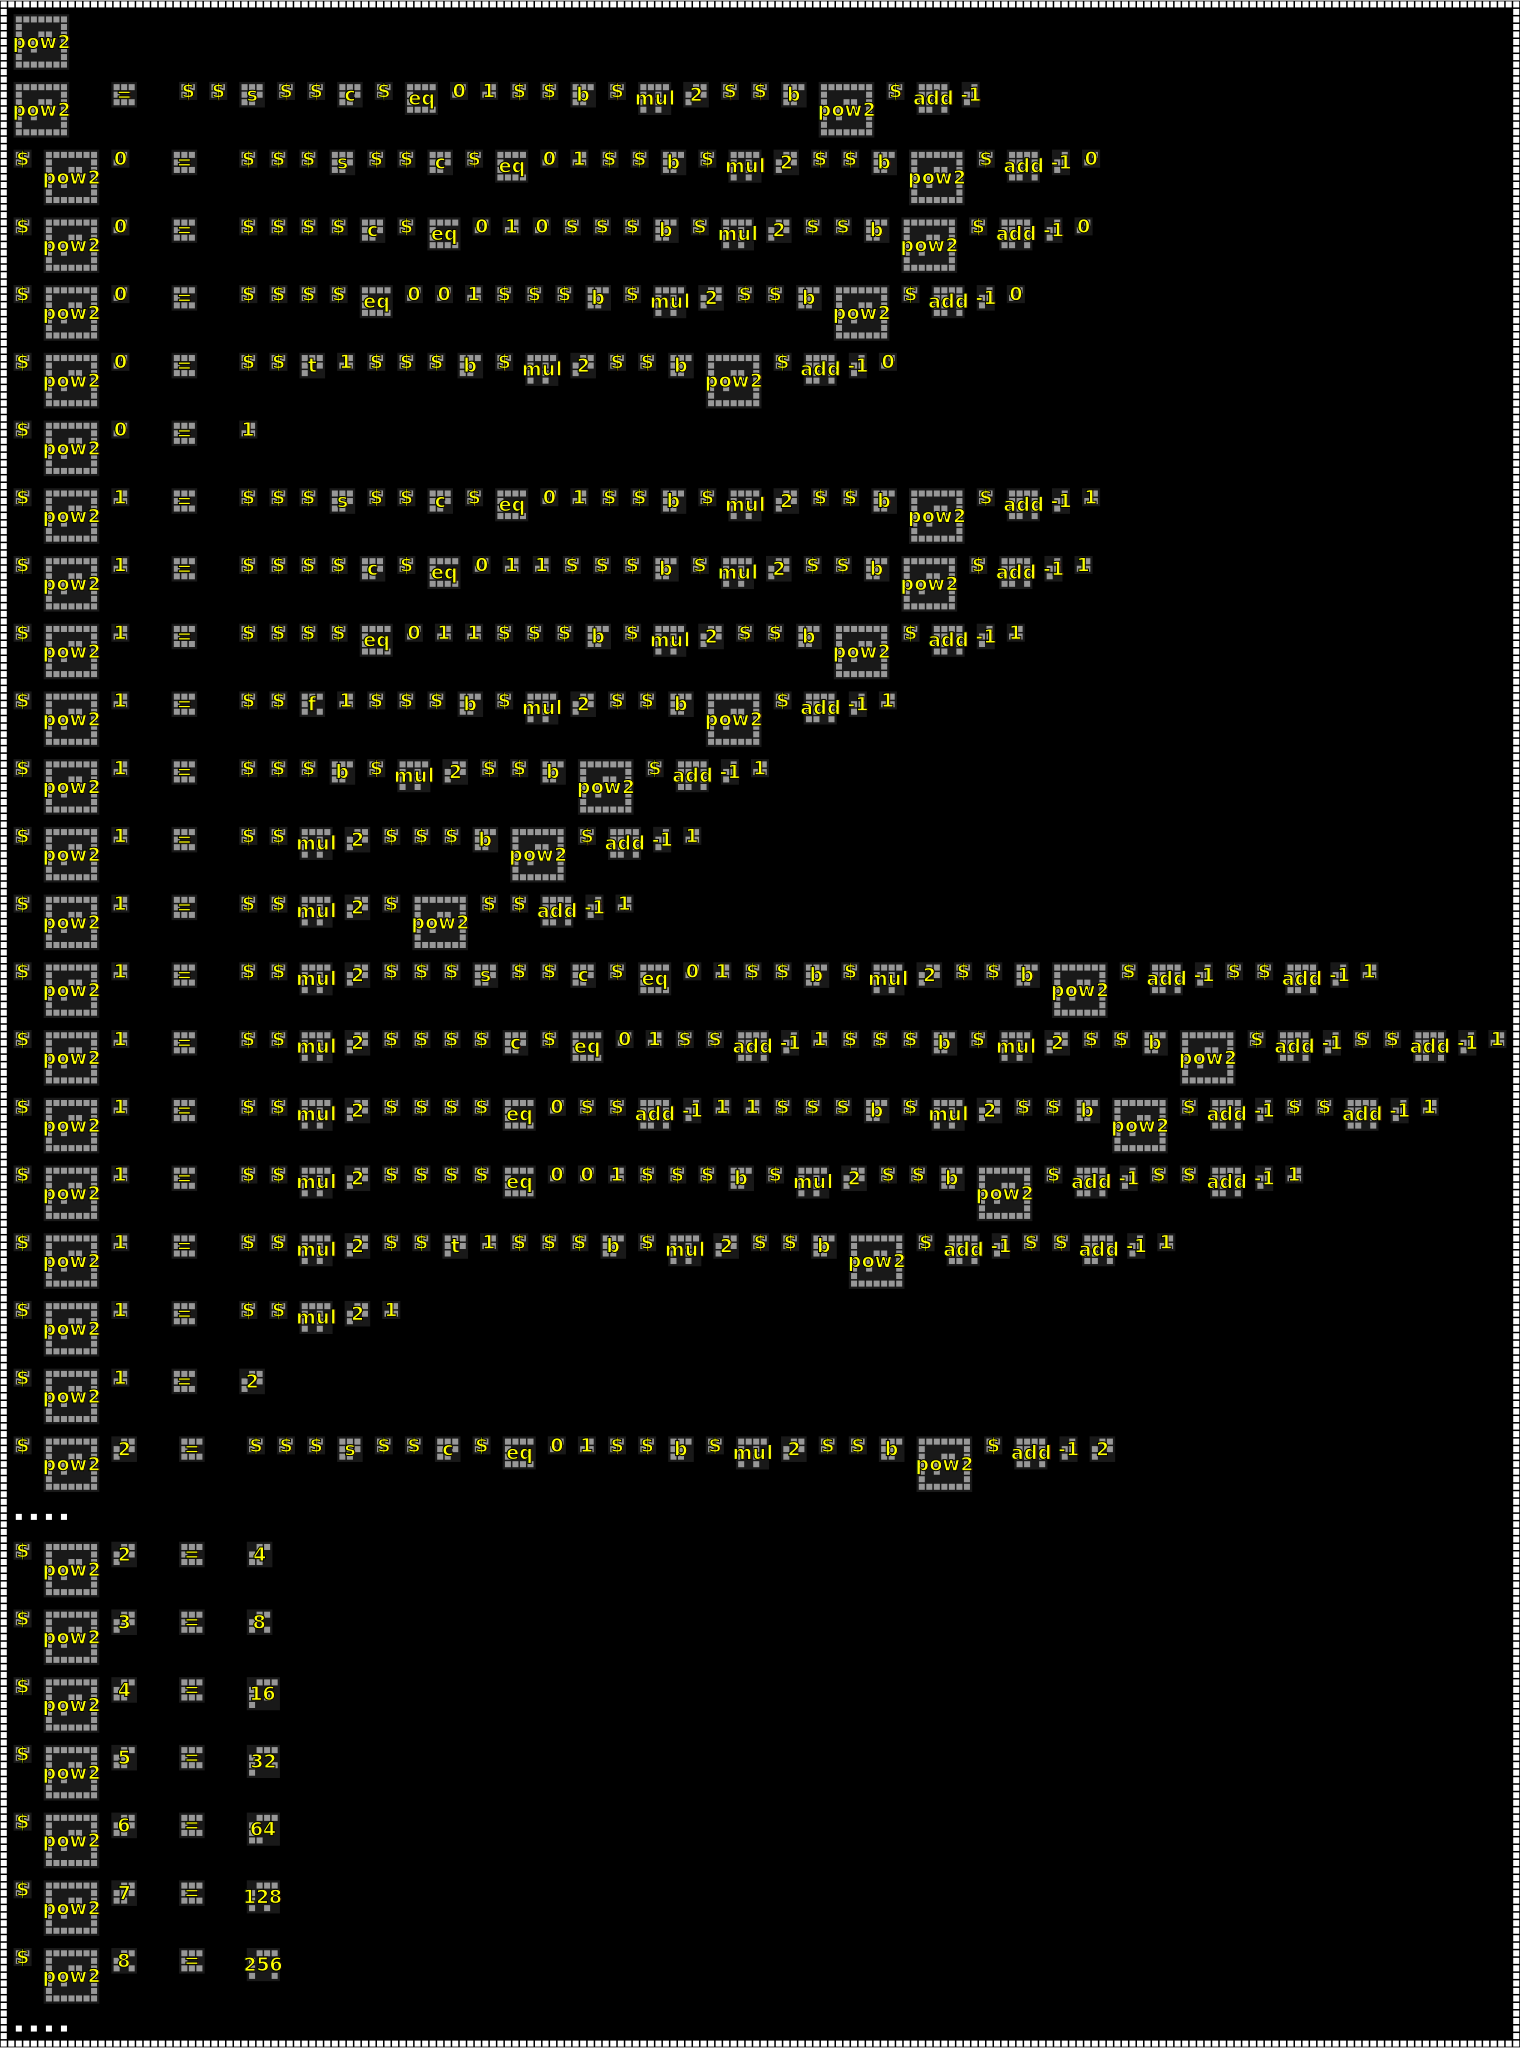

pow2
pow2 = $ $ s $ $ c $ eq 0 1 $ $ b $ mul 2 $ $ b pow2 $ add -1
$ pow2 0 = $ $ $ s $ $ c $ eq 0 1 $ $ b $ mul 2 $ $ b pow2 $ add -1 0
$ pow2 0 = $ $ $ $ c $ eq 0 1 0 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 0
$ pow2 0 = $ $ $ $ eq 0 0 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 0
$ pow2 0 = $ $ t 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 0
$ pow2 0 = 1
$ pow2 1 = $ $ $ s $ $ c $ eq 0 1 $ $ b $ mul 2 $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ $ $ c $ eq 0 1 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ $ $ eq 0 1 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ f 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ $ b $ mul 2 $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ mul 2 $ $ $ b pow2 $ add -1 1
$ pow2 1 = $ $ mul 2 $ pow2 $ $ add -1 1
$ pow2 1 = $ $ mul 2 $ $ $ s $ $ c $ eq 0 1 $ $ b $ mul 2 $ $ b pow2 $ add -1 $ $ add -1 1
$ pow2 1 = $ $ mul 2 $ $ $ $ c $ eq 0 1 $ $ add -1 1 $ $ $ b $ mul 2 $ $ b pow2 $ add -1 $ $ add -1 1
$ pow2 1 = $ $ mul 2 $ $ $ $ eq 0 $ $ add -1 1 1 $ $ $ b $ mul 2 $

In [31]:
annotate_and_decode('data/message23.png')

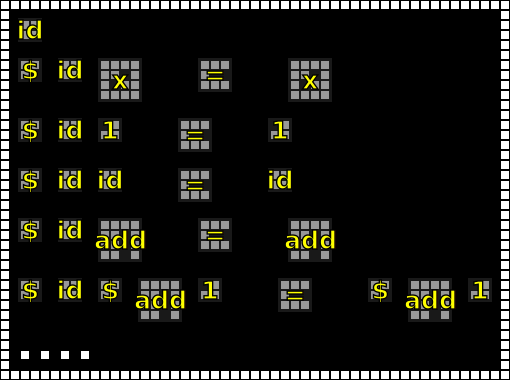

id
$ id x = x
$ id 1 = 1
$ id id = id
$ id add = add
$ id $ add 1 = $ add 1


In [32]:
annotate_and_decode('data/message24.png')

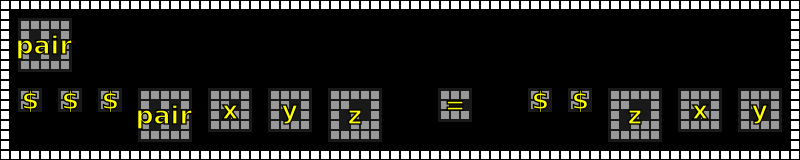

pair
$ $ $ pair x y z = $ $ z x y


In [33]:
annotate_and_decode('data/message25.png')

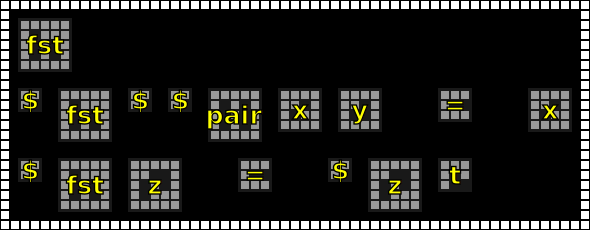

fst
$ fst $ $ pair x y = x
$ fst z = $ z t


In [34]:
annotate_and_decode('data/message26.png')

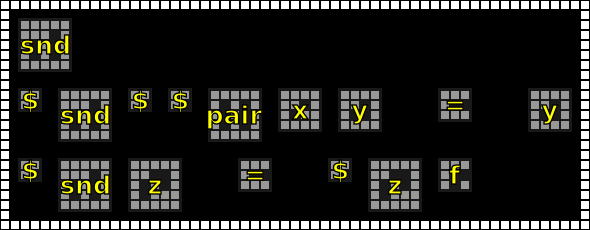

snd
$ snd $ $ pair x y = y
$ snd z = $ z f


In [35]:
annotate_and_decode('data/message27.png')

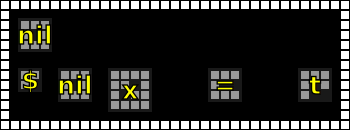

nil
$ nil x = t


In [36]:
annotate_and_decode('data/message28.png')

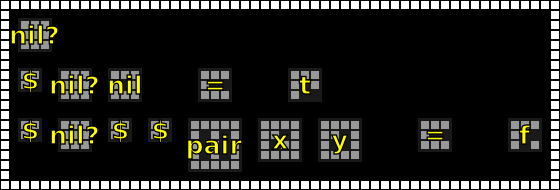

nil?
$ nil? nil = t
$ nil? $ $ pair x y = f


In [37]:
annotate_and_decode('data/message29.png')

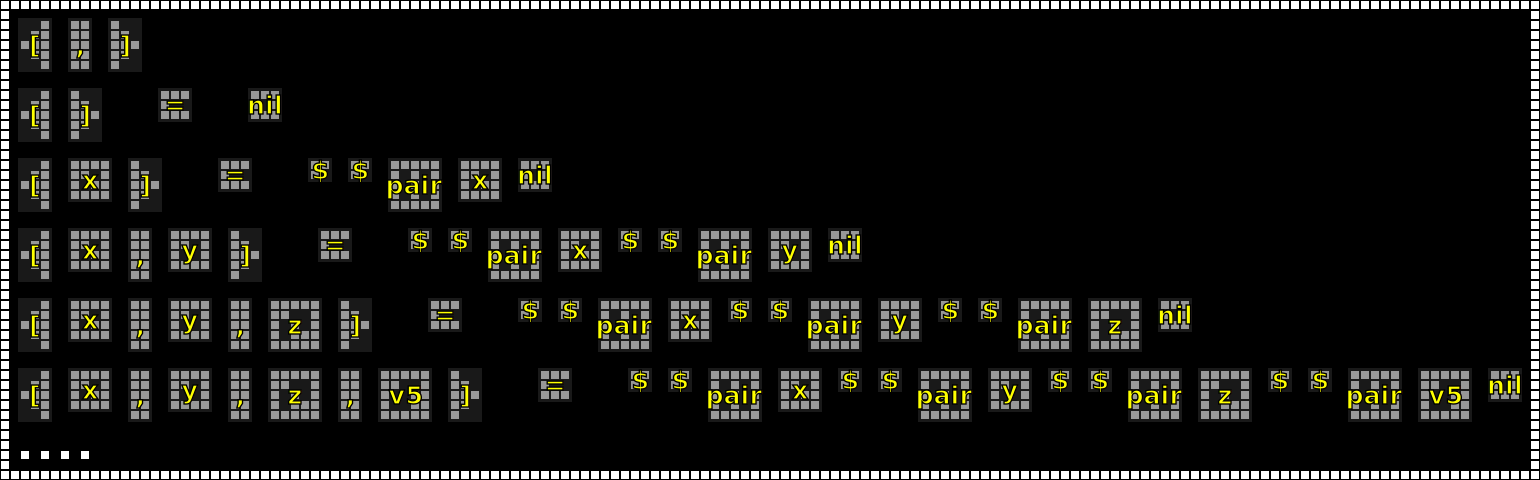

[ , ]
[ ] = nil
[ x ] = $ $ pair x nil
[ x , y ] = $ $ pair x $ $ pair y nil
[ x , y , z ] = $ $ pair x $ $ pair y $ $ pair z nil
[ x , y , z , v5 ] = $ $ pair x $ $ pair y $ $ pair z $ $ pair v5 nil


In [38]:
annotate_and_decode('data/message30.png')

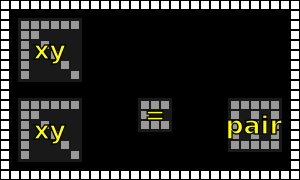

xy
xy = pair


In [39]:
annotate_and_decode('data/message31.png')

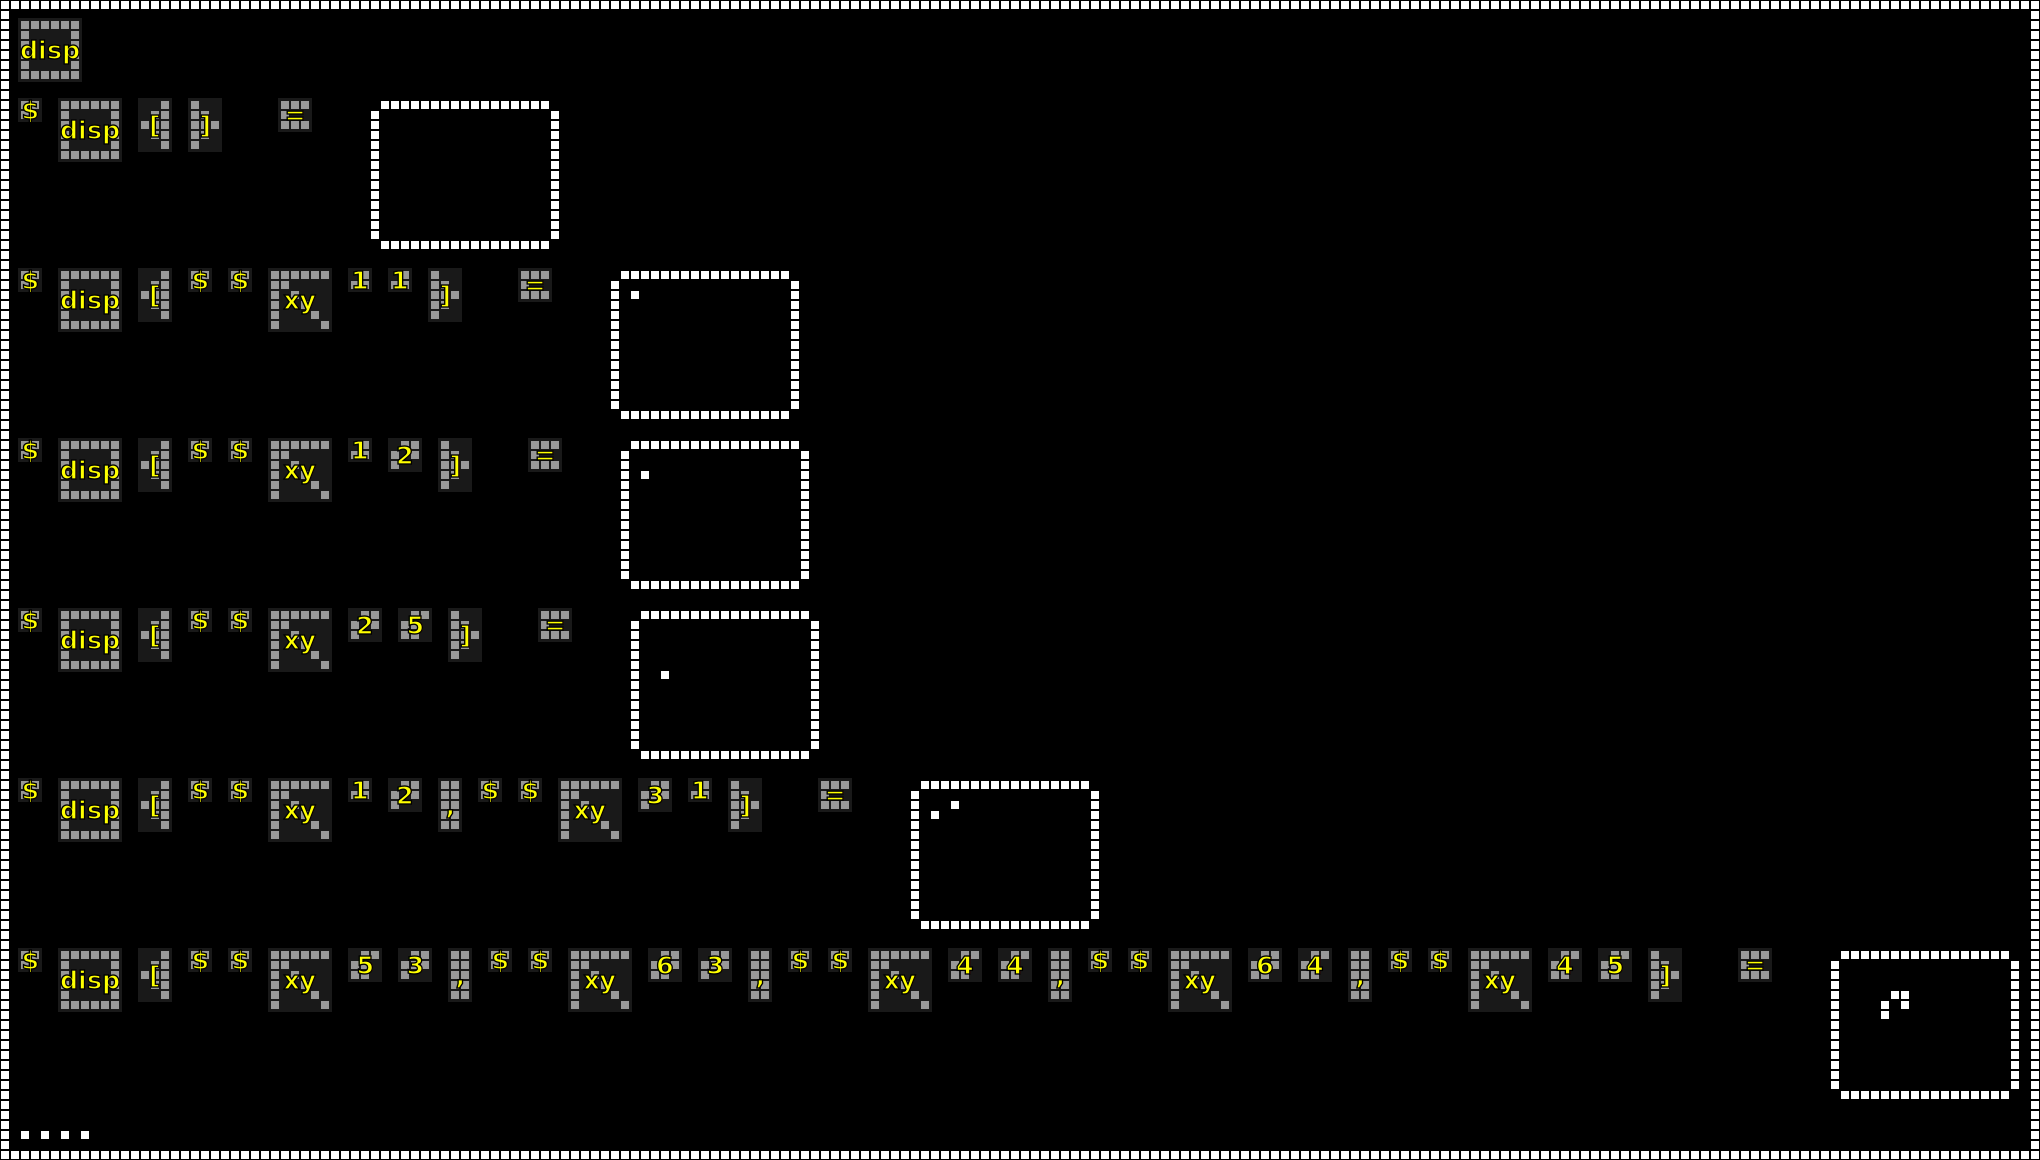

disp
$ disp [ ] =
$ disp [ $ $ xy 1 1 ] =
$ disp [ $ $ xy 1 2 ] =
$ disp [ $ $ xy 2 5 ] =
$ disp [ $ $ xy 1 2 , $ $ xy 3 1 ] =
$ disp [ $ $ xy 5 3 , $ $ xy 6 3 , $ $ xy 4 4 , $ $ xy 6 4 , $ $ xy 4 5 ] =


In [40]:
annotate_and_decode('data/message32.png')

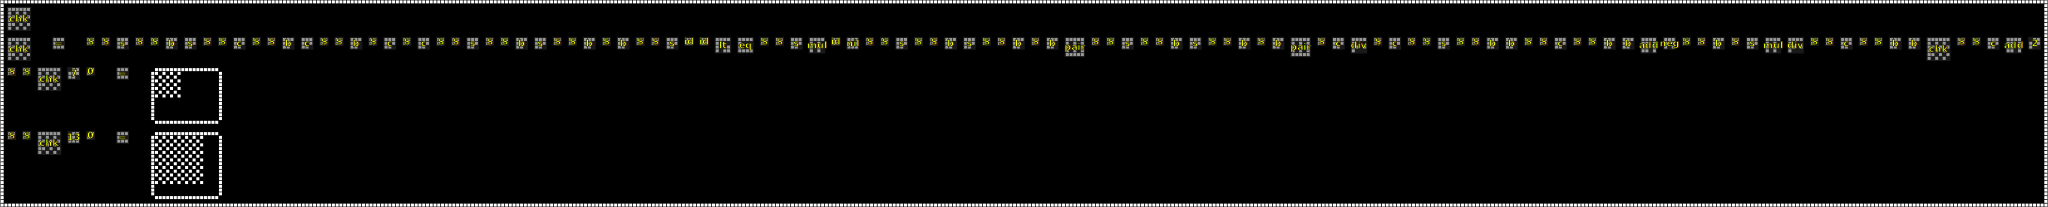

chk
chk = $ $ s $ $ b s $ $ c $ $ b c $ $ b $ c $ c $ $ s $ $ b s $ $ b $ b $ $ s id id lt eq $ $ s mul id nil $ $ s $ $ b s $ $ b $ b pair $ $ s $ $ b s $ $ b $ b pair $ c div $ c $ $ s $ $ b b $ $ c $ $ b b add neg $ $ b $ s mul div $ $ c $ $ b b chk $ $ c add 2
$ $ chk 7 0 =
$ $ chk 13 0 =


In [41]:
annotate_and_decode('data/message33.png')

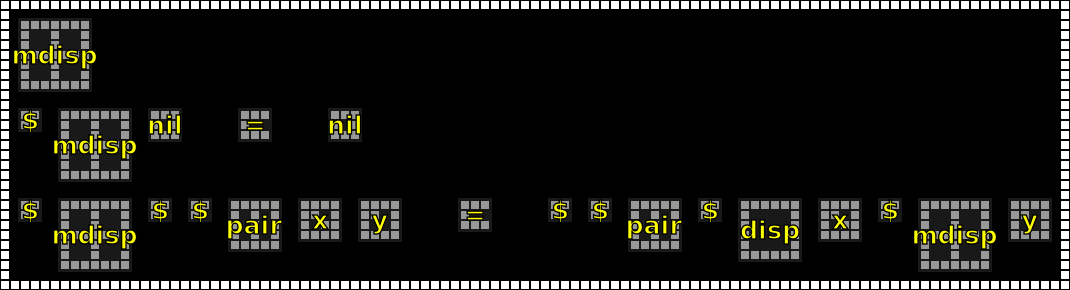

mdisp
$ mdisp nil = nil
$ mdisp $ $ pair x y = $ $ pair $ disp x $ mdisp y


In [42]:
annotate_and_decode('data/message34.png')

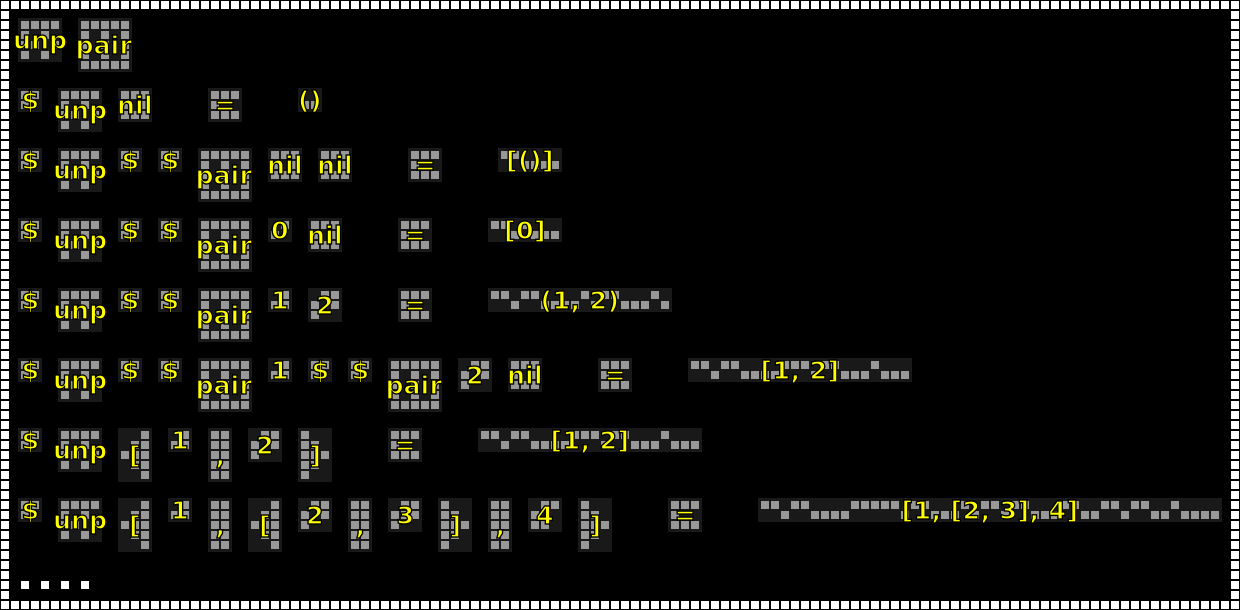

unp pair
$ unp nil = ()
$ unp $ $ pair nil nil = [()]
$ unp $ $ pair 0 nil = [0]
$ unp $ $ pair 1 2 = (1, 2)
$ unp $ $ pair 1 $ $ pair 2 nil = [1, 2]
$ unp [ 1 , 2 ] = [1, 2]
$ unp [ 1 , [ 2 , 3 ] , 4 ] = [1, [2, 3], 4]


In [43]:
annotate_and_decode('data/message35.png')

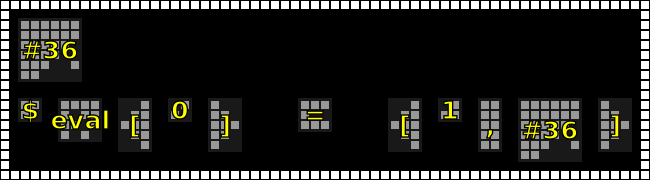

#36
$ eval [ 0 ] = [ 1 , #36 ]


In [44]:
annotate_and_decode('data/message36.png')

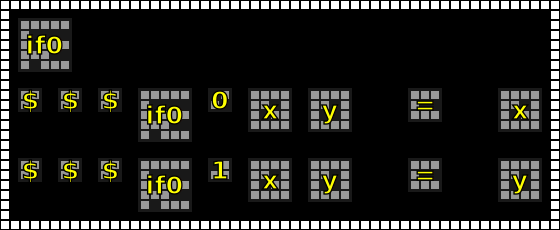

if0
$ $ $ if0 0 x y = x
$ $ $ if0 1 x y = y


In [45]:
annotate_and_decode('data/message37.png')

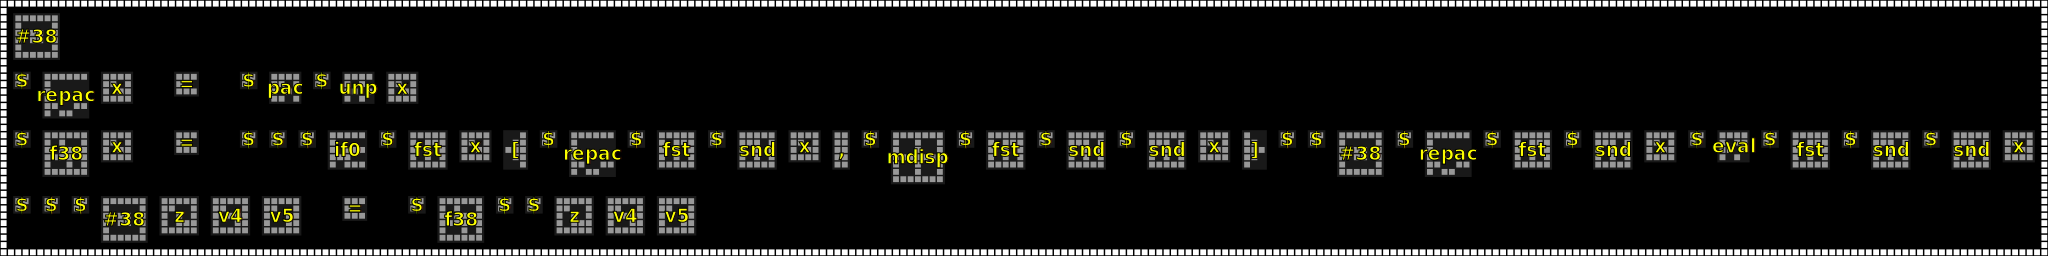

#38
$ repac x = $ pac $ unp x
$ f38 x = $ $ $ if0 $ fst x [ $ repac $ fst $ snd x , $ mdisp $ fst $ snd $ snd x ] $ $ #38 $ repac $ fst $ snd x $ eval $ fst $ snd $ snd x
$ $ $ #38 z v4 v5 = $ f38 $ $ z v4 v5


In [46]:
annotate_and_decode('data/message38.png')

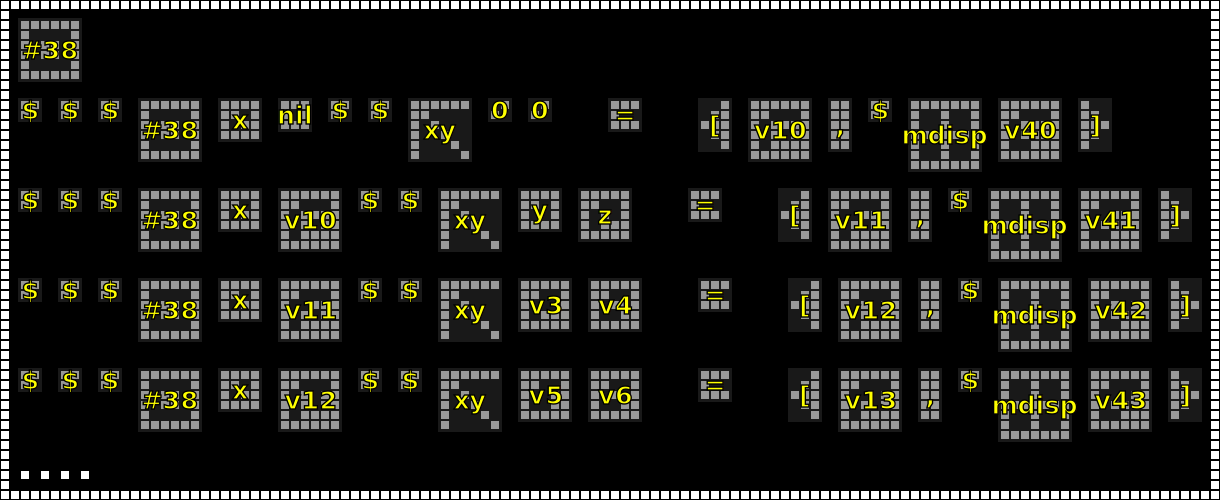

#38
$ $ $ #38 x nil $ $ xy 0 0 = [ v10 , $ mdisp v40 ]
$ $ $ #38 x v10 $ $ xy y z = [ v11 , $ mdisp v41 ]
$ $ $ #38 x v11 $ $ xy v3 v4 = [ v12 , $ mdisp v42 ]
$ $ $ #38 x v12 $ $ xy v5 v6 = [ v13 , $ mdisp v43 ]


In [47]:
annotate_and_decode('data/message39.png')

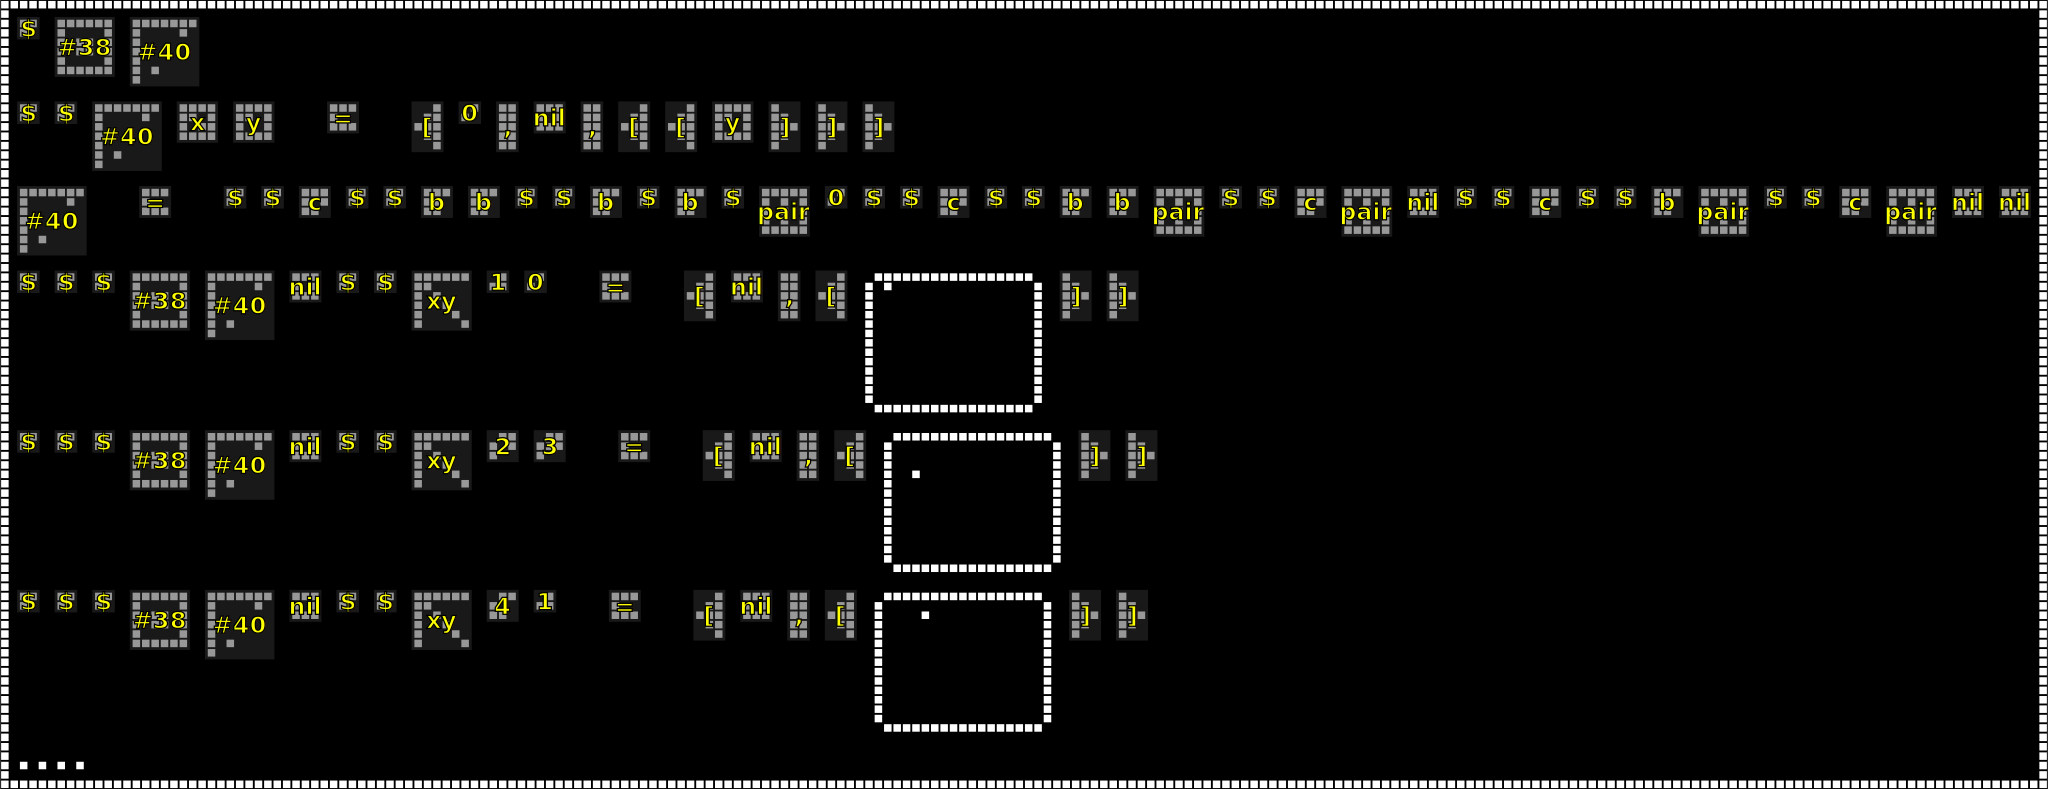

$ #38 #40
$ $ #40 x y = [ 0 , nil , [ [ y ] ] ]
#40 = $ $ c $ $ b b $ $ b $ b $ pair 0 $ $ c $ $ b b pair $ $ c pair nil $ $ c $ $ b pair $ $ c pair nil nil
$ $ $ #38 #40 nil $ $ xy 1 0 = [ nil , [ ] ]
$ $ $ #38 #40 nil $ $ xy 2 3 = [ nil , [ ] ]
$ $ $ #38 #40 nil $ $ xy 4 1 = [ nil , [ ] ]


In [48]:
annotate_and_decode('data/message40.png')

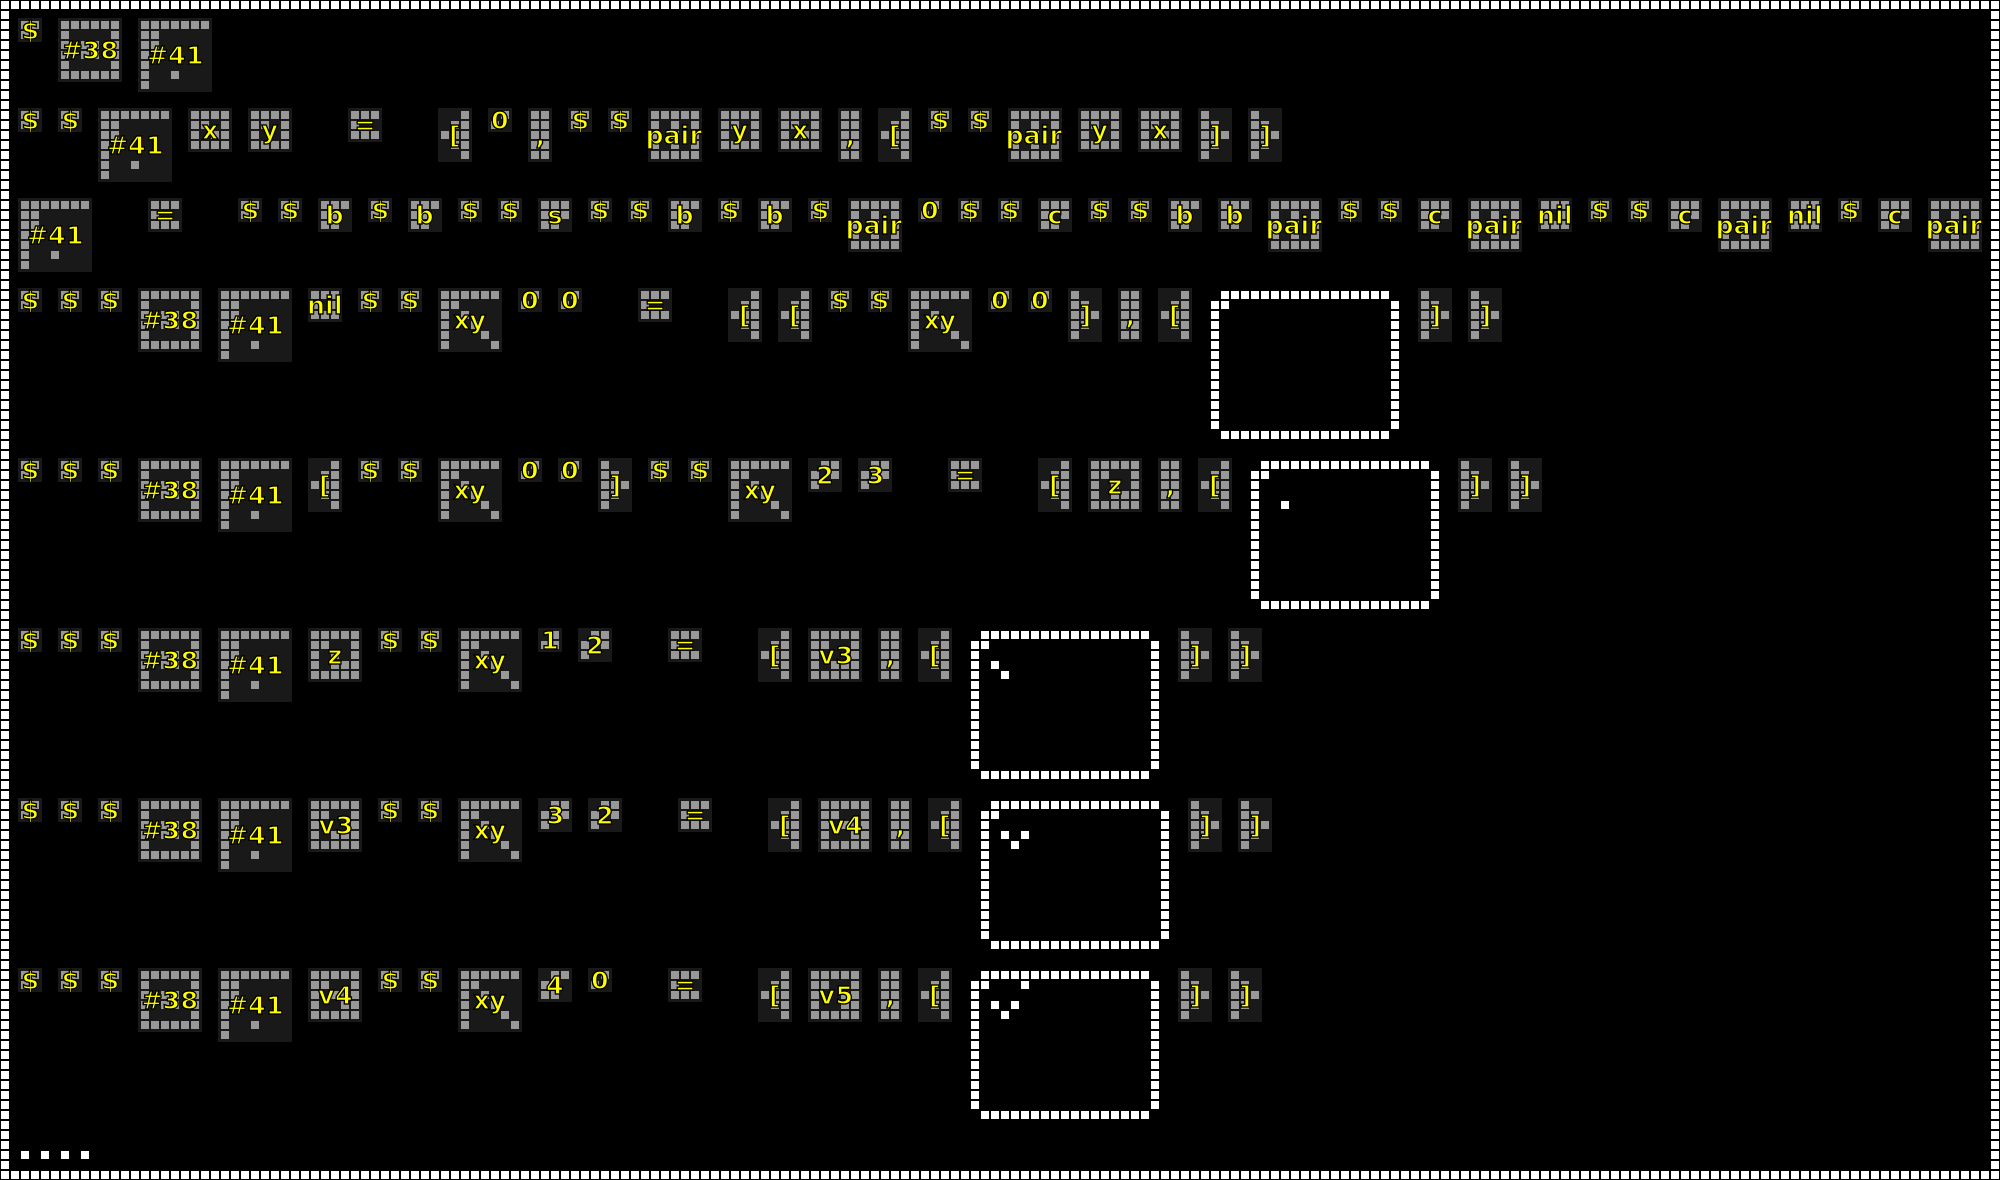

$ #38 #41
$ $ #41 x y = [ 0 , $ $ pair y x , [ $ $ pair y x ] ]
#41 = $ $ b $ b $ $ s $ $ b $ b $ pair 0 $ $ c $ $ b b pair $ $ c pair nil $ $ c pair nil $ c pair
$ $ $ #38 #41 nil $ $ xy 0 0 = [ [ $ $ xy 0 0 ] , [ ] ]
$ $ $ #38 #41 [ $ $ xy 0 0 ] $ $ xy 2 3 = [ z , [ ] ]
$ $ $ #38 #41 z $ $ xy 1 2 = [ v3 , [ ] ]
$ $ $ #38 #41 v3 $ $ xy 3 2 = [ v4 , [ ] ]
$ $ $ #38 #41 v4 $ $ xy 4 0 = [ v5 , [ ] ]


In [49]:
annotate_and_decode('data/message41.png')

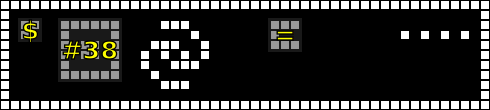

$ #38 =


In [50]:
annotate_and_decode('data/message42.png')